#**Project (1): Training Neural Networks**
## Introduction

- In this project, we will build a neural network from scratch using PyTorch and train it on
the MNIST dataset for handwritten digit recognition.
We will also add dropout and regularization layers to improve the model’s performance. Finally, We will hyper-tune the optimizer type, learning rate, and batch size to achieve the best
possible results.


##Oultine:

-  [1- Packages](#1)
-  [2- Dataset](#2)
 - [2.1- Visualizing Our Dataset](#2.1)
 - [2.2- Loading The Dataset Using Pytorch](#2.2)
 - [2.3- Training the neural network](#2.3)
 - [2.4- Plots](#2.4)
- [3- Retraining The Model](#3)
 - [Adding Dropout Layer & Layers Normalization](#3.1)
 - [Plots](#3.2)
 - [Model 1](#3.3)
 - [Model 2](#3.4)
 - [Model 3](#3.5)

<a name="1"></a>
### 1 - Packages 

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
-[pandas](https://pandas.pydata.org/) a Python package providing fast, flexible, and expressive data structures.
-[pytorch](https://pytorch.org/) a machine learning framework based on the Torch library, used for applications such as computer vision and natural language processing.
-[math](https://docs.python.org/3/library/math.html) a built-in module in the Python 3 standard library that provides standard mathematical constants and functions. 
-[torch](https://pypi.org/project/torch/) an open source ML library used for creating deep neural networks and is written in the Lua scripting language.


In [ ]:
import math
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torchvision import datasets, transforms

#Allow plots to be displayed directly in the Jupyter Notebook, rather than in a separate window or file
%matplotlib inline

<a name="2"></a>
### 2- Dataset

We will start by loading the dataset for our project. 
- The `load_data()` function loads the data into variables `X_train` and `y_train` and `X_val` and `y_val`.


- The data set contains 48000 x 784 training examples of handwritten digits $^1$.  

    - Each training example is a 28-pixel x 28-pixel grayscale image of the digit. 
        - Each pixel is represented by a floating-point number indicating the grayscale intensity at that location. 
        - Each training examples becomes a single row in our data matrix `X_train`.

$$X_{train} = 
\left(\begin{array}{cc} 
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\ 
--- (x^{(m)}) --- 
\end{array}\right)$$ 

- The second part of the training set is a 12000 x 784 dimensional vector `y_train` that contains labels for the training set
    - `y = 0` if the image is of the digit `0`, `y = 4` if the image is of the digit `4` and so on.

In [ ]:
# Load the dataset
df = pd.read_csv("/content/mnist.csv")

# Split the dataframe into input features and target labels
X = df.drop("label", axis=1).values
y = df["label"].values

# Normalize the input features to have zero mean and unit variance
X = (X - np.mean(X)) / np.std(X)

# Split the data into training and validation sets
# random_state parameter is set to a fixed value to ensure reproducibility of the results
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# Print the shapes of the resulting arrays
print ("Training set shapes:")
print("X_train:"+str(X_train.shape))
print("y_train"+ str(y_train.shape))
print ("Validation set shapes:")
print("X_val:"+str(X_val.shape))
print("y_val"+ str(y_val.shape))

In [ ]:
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<a name="2.1"></a>
### 2.1. Visualizing the Data

We will begin by visualizing a subset of the training set. 
- This code randomly selects 64 rows from `X_train`, maps each row back to a 28 pixel by 28 pixel grayscale image and displays the images together. 
- The label for each image is displayed above the image

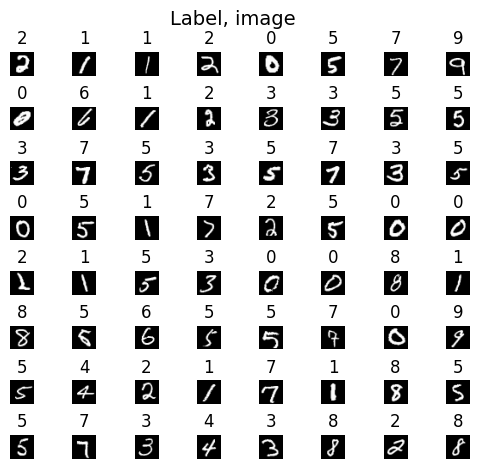

In [ ]:
m, n = X_train.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
# [left, bottom, right, top]
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) 

for i,ax in enumerate(axes.flat):
    # Selecting random indices
    random_index = np.random.randint(m)
    
    # Selecting rows corresponding to the random indices and reshaping the image
    X_random_reshaped = X_train[random_index].reshape((28,28))
    
    # Displaying the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Displaying the label above the image
    ax.set_title(y_train[random_index])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)


<a name="2.2"></a>
# 2.2. Loading The Dataset Using Pytorch
The MNIST dataset contains black and white, hand-written (numerical) digits
that are 28x28 pixels large.

In [ ]:
mnisttrain = datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor())
mnist_train = list(mnisttrain)
mnist_train, mnist_val = train_test_split(mnisttrain, train_size=0.8, random_state=42)
# (X_train, y_train), (X_val, y_val)=train_test_split(mnisttrain, train_size=0.8, random_state=42)

100%|██████████| 9912422/9912422 [00:00<00:00, 166106175.27it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 72276666.96it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 86821976.96it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 801385.19it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
# Multi-layer perceptron
# Define a class called MLP that inherits from nn.Module class in pytorch
class MLP(nn.Module):
    # num_hidden1' and 'num_hidden2' to specify the number of neurons in the first and second hidden layers
    def __init__(self, num_hidden1, num_hidden2):
        super(MLP, self).__init__()
        # create 3 'nn.Linear' objects
        self.fc1 = nn.Linear(28 * 28, num_hidden1) 
        self.fc2 = nn.Linear(num_hidden1, num_hidden2) 
        self.fc3 = nn.Linear(num_hidden2, 10) # output is 10 numbers from 0 to 9
        self.num_hidden1 = num_hidden1
        self.num_hidden2 = num_hidden2
        
    # This is the forward method which specifies how input data is processed through the network it takes an input tensor img as its argument
    def forward(self, img):
        flattened = img.view(-1, 28 * 28) # flatten the input image 
        activation1 = self.fc1(flattened) 
        activation1 = torch.relu(activation1) # apply the ReLU activation fn 
        activation2 = self.fc2(activation1) 
        activation2 = torch.relu(activation2) 
        activation3 = self.fc3(activation2) 
        return activation3

One way to gauge the "complexity" or the "capacity" of the
neural network is by looking at the number of parameters that it
has.

In [ ]:
# This fn then prints the total number of parameters in the model by computing the sum of the number of elements in each parameter tensor of the model
def print_num_parameters(model, name="model"):
    print("Number of parameters in %s" % name,
          sum(p.numel() for p in model.parameters()))

print_num_parameters(MLP(200,200), "MLP(200,200)")

Number of parameters in MLP(200,200) 199210


<a name="2.3"></a>
## 2.3. Training the neural network

We'll use a fairly configurable training function that computes
both training and validation accuracy in each iteration.

In [ ]:
# train a PyTorch model on a given dataset
def train(model, data, batch_size=64, weight_decay=0.0,
          optimizer="adam", learning_rate=0.01, momentum=0.9,
          data_shuffle=True, num_epochs=10):
    # initializes a 'DataLoader' to load the training data in batches 
    train_loader = torch.utils.data.DataLoader(data,
                                               batch_size=batch_size,
                                               shuffle=data_shuffle)
    # cross-entropy loss function to measure the difference between the predicted and actual labels
    criterion = nn.CrossEntropyLoss()
    # Depending on the optimizer specified it initializes an optimizer object with the appropriate hyperparameters (in our case we want the adam optimizer or stochastic gradient descent[sgd])
    assert optimizer in ("sgd", "adam")
    if optimizer == "sgd":
        optimizer = optim.SGD(model.parameters(),
                              lr=learning_rate,
                              momentum=momentum,
                              weight_decay=weight_decay)
    else:
        optimizer = optim.Adam(model.parameters(),
                               lr=learning_rate,
                               weight_decay=weight_decay)
    # initializes 4 empty lists to track the learning curve during training
    iters, losses, train_acc, val_acc = [], [], [], []
    # track the number of iterations processed during training for plotting purposes
    n = 0 
    # for-loop that iterates over the specified number of epochs
    for epoch in range(num_epochs):
      # For each epoch the function iterates over the batches in the 'train_loader' object and trains the model on each batch
        for imgs, labels in iter(train_loader):
            if imgs.size()[0] < batch_size:
                continue

            model.train() # annotate model for training
            out = model(imgs)
            loss = criterion(out, labels) # After each batch the function computes the loss, backpropagates to update the model parameters, and tracks the loss in the 'losses' list
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            train_acc.append(get_accuracy(model, train=True)) # compute training accuracy 
            val_acc.append(get_accuracy(model, train=False))  # compute validation accuracy
            n += 1

    window_size = 10 # specify the window size for the moving average
    train_acc_ma = pd.Series(train_acc).rolling(window_size).mean() # calculate the moving average of the training accuracy
    train_loss_ma = pd.Series(losses).rolling(window_size).mean()

    # plotting the learning curve of the training process
    # The first plot shows the change in loss over the iterations (batches) in the training process
    plt.title("Learning Curve")
    plt.plot(iters, losses, label="Train")
    plt.plot(iters, train_loss_ma, label="Moving Average")
    # The method 'plt.xlabel()' and 'plt.ylabel()' are used to label the x and y axes
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    # The second plot shows the change in training and validation accuracy over the iterations (batches) in the training process.
    plt.title("Learning Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.plot(iters, train_acc_ma, label="Moving Average")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    # 'plt.legend()' method is used to create a legend for the plot
    plt.legend(loc='best')
    plt.show()

    # After the plots are displayed, the function prints the final training accuracy and validation accuracy of the model
    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

And of course, we need the `get_accuracy` helper function. To turn the probabilities
into a discrete prediction, we will take the digit with the highest probability.
Because of the way softmax is computed, the digit with the highest probability is
the same as the digit with the (pre-activation) output value.

In [ ]:
# define a fn that takes a PyTorch model as input and returns the accuracy of the model 
def get_accuracy(model, train=False):
    # If 'train' is True the function loads the training set (mnist_train) into a PyTorch DataLoader object with a batch size of 4096
    if train:
        data = torch.utils.data.DataLoader(mnist_train, batch_size=4096)
    # Otherwise it loads the validation set (mnist_val) into a PyTorch DataLoader object with a batch size of 1024    
    else:
        data = torch.utils.data.DataLoader(mnist_val, batch_size=1024)

    model.eval() # annotate model for evaluation
    # 'correct' will keep track of the number of correctly classified examples, while 'total' will keep track of the total number of examples evaluated
    correct = 0
    total = 0
    # The fn then loops over each batch of examples in the data loader
    # For each batch, it passes the batch of images 'imgs' through the model to obtain a batch of predicted class probabilities 'output'
    for imgs, labels in data:
        output = model(imgs) 
        pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        # The 'eq' method is used to compare the predicted classes 'pred' with the true labels 'labels.view_as(pred)', and the number of correct predictions is added to 'correct'
        correct += pred.eq(labels.view_as(pred)).sum().item()
        # Finally the number of examples in the batch is added to 'total'
        total += imgs.shape[0]
    return correct / total

<a name="2.4"></a>
## Plots
- Training / Validation Loss
- Training / Validation Accuracy

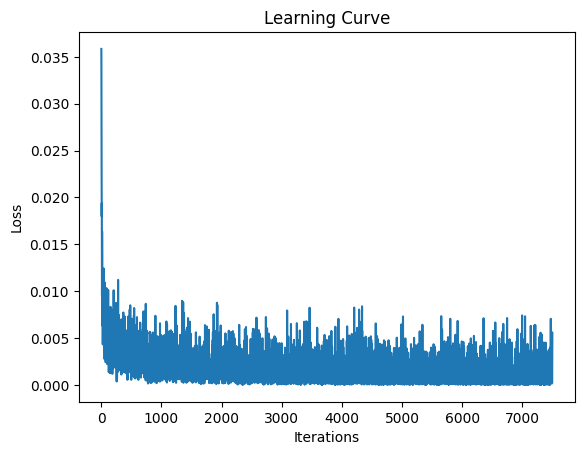

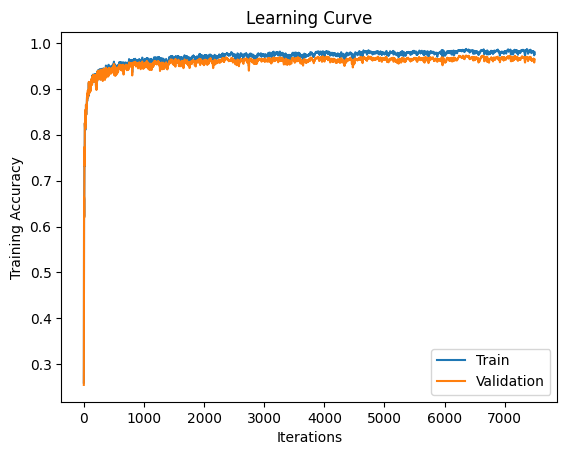

Final Training Accuracy: 0.9792916666666667
Final Validation Accuracy: 0.9638333333333333


In [ ]:
model = MLP(100, 50)
train(model, mnist_train, optimizer="adam", learning_rate=0.01, num_epochs=10)

Let's see what the training curve of a multi-layer perceptron looks like.

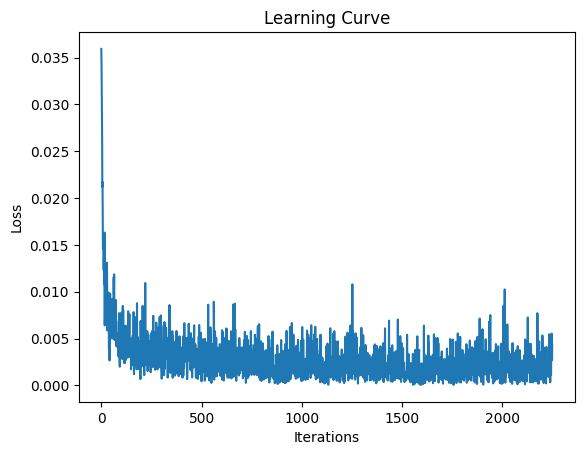

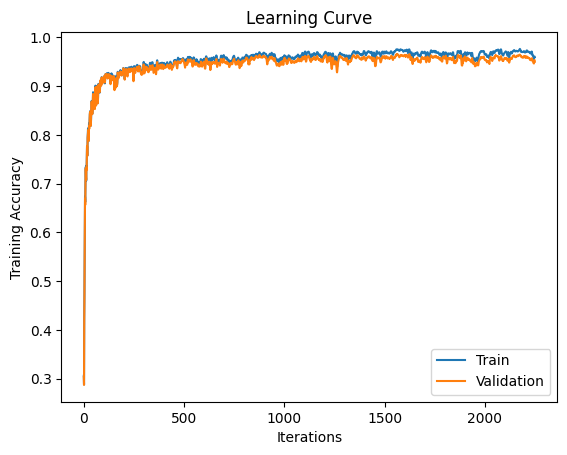

Final Training Accuracy: 0.9592083333333333
Final Validation Accuracy: 0.94975


In [ ]:
model = MLP(100, 50)
train(model, mnist_train, optimizer="adam", learning_rate=0.01, num_epochs=3)

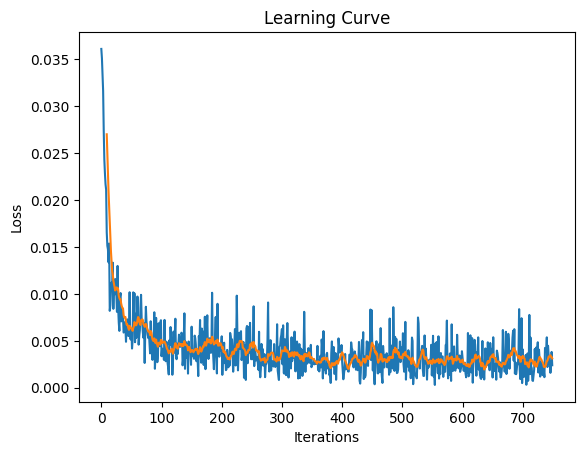

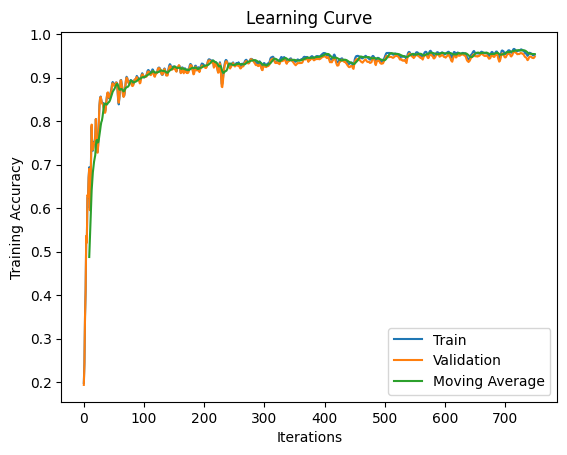

Final Training Accuracy: 0.9525833333333333
Final Validation Accuracy: 0.9478333333333333


In [ ]:
model = MLP(100, 50)
train(model, mnist_train, optimizer="adam", learning_rate=0.01, num_epochs=1)

### MLP Hidden Unit Size

The first thing we'll explore is the hidden unit size. If we increase the number
of hidden units in a MLP, we'll increase its parameters counts.

In [ ]:
print_num_parameters(MLP(10,5), "MLP with 10 hidden units in the first layer & 5 hidden units in the second layer:")
print_num_parameters(MLP(50,25), "MLP with 50 hidden units in the first layer & 25 hidden units in the second layer:")
print_num_parameters(MLP(100,50), "MLP with 100 hidden units in the first layer & 50 hidden units in the second layer:")
print_num_parameters(MLP(200,100), "MLP with 200 hidden unitsin the first layer & 100 hidden units in the second layer:")

Number of parameters in MLP with 10 hidden units in the first layer & 5 hidden units in the second layer: 7965
Number of parameters in MLP with 50 hidden units in the first layer & 25 hidden units in the second layer: 40785
Number of parameters in MLP with 100 hidden units in the first layer & 50 hidden units in the second layer: 84060
Number of parameters in MLP with 200 hidden unitsin the first layer & 100 hidden units in the second layer: 178110


With more hidden units, our model has more "capacity", and can learn
more intricate patterns in the training data. Our training accuracy will
therefore be higher. However, the computation time for training and
using these networks will also increase.

Adding more parameters tend to widen the gap between training and validation
accuracy. As we add too many parameters, we could overfit.

A smaller network will train faster, but may have worse training accuracy.
Bear in mind that since the neural networks initialization is random

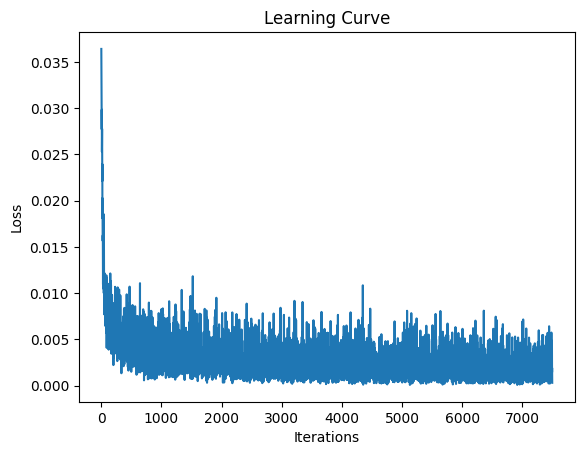

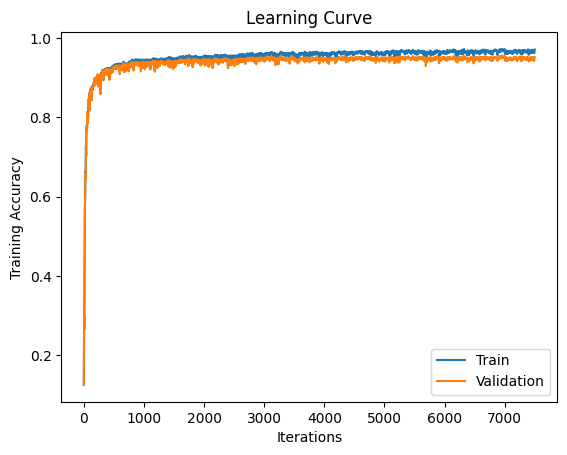

Final Training Accuracy: 0.9713333333333334
Final Validation Accuracy: 0.95225


In [ ]:
model = MLP(30, 5)
train(model, mnist_train, optimizer="adam", learning_rate=0.01)

###Number of Epoch
We'll mainly experiment with the `MLP(30, 5)` model, since it trains the fastest.
We'll measure how quickly the model trains by looking at how far we get in 
first 3 epochs of training.

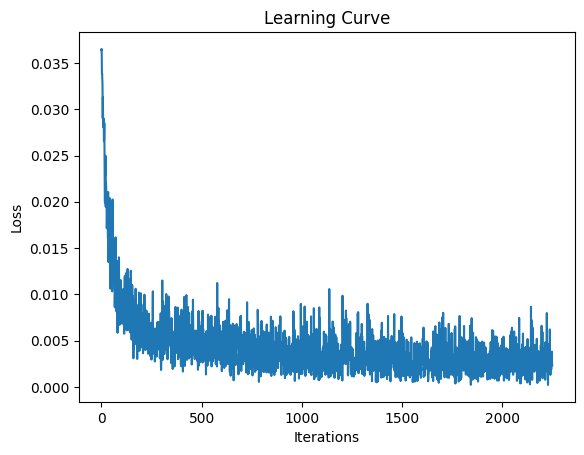

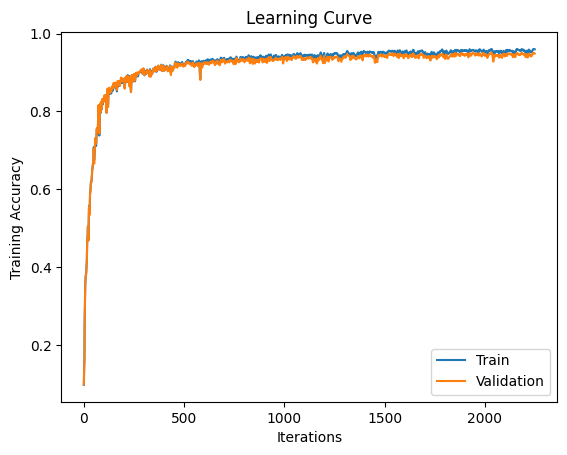

Final Training Accuracy: 0.9595625
Final Validation Accuracy: 0.9484166666666667


In [ ]:
model = MLP(30, 5)
train(model, mnist_train, optimizer="adam", learning_rate=0.01, num_epochs=3)

Let's also try it with only one epoch of training

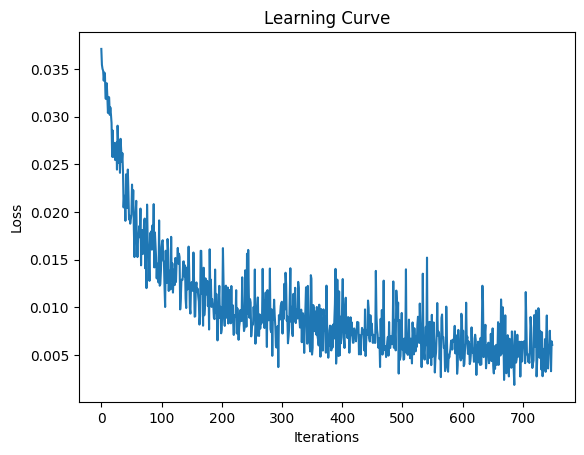

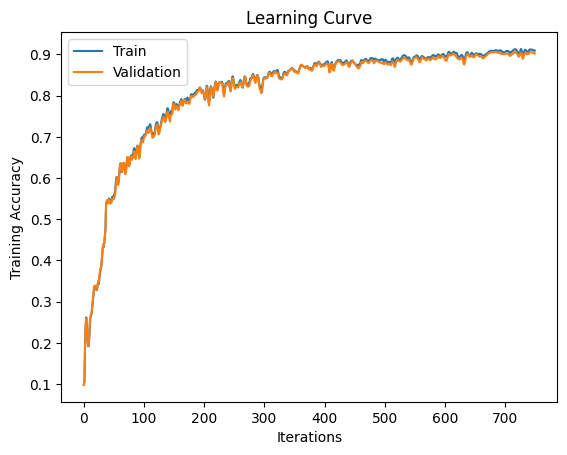

Final Training Accuracy: 0.9092083333333333
Final Validation Accuracy: 0.9023333333333333


In [ ]:
model = MLP(30, 5)
train(model, mnist_train, optimizer="adam", learning_rate=0.01, num_epochs=1)

<a name="3"></a>
# Retraining The Model


<a name="3.1"></a>
##Adding Dropout Layers & Layers Normalization


In [ ]:
class NMLP(nn.Module):
    # We defined two normalization layers 'layer_norm' and 'layer_norm2' using the `nn.LayerNorm` module these layers normalize the activations in each layer of the network

    def __init__(self, num_hidden1, num_hidden2, dropout_prob):
        super(NMLP, self).__init__()
        self.fc1 = nn.Linear(28*28, num_hidden1)
        self.fc2 = nn.Linear(num_hidden1, num_hidden2)
        self.fc3 = nn.Linear(num_hidden2, 10)
        self.dropout = nn.Dropout(p=dropout_prob) # we defined a dropout layer 'dropout' using the 'nn.Dropout' module, This layer randomly drops out some of the activations in the network during training, which can help prevent overfitting
        self.layer_norm1 = nn.LayerNorm(num_hidden1)
        self.layer_norm2 = nn.LayerNorm(num_hidden2)
    
    # applied these layers in the forward method after each linear layer and before the activation function 
    def forward(self, img):
        flattened = img.view(-1, 28 * 28)  # first flatten the input image using the 'view' method
        activation1 = self.layer_norm1(self.fc1(flattened)) #  then apply the first linear layer to the flattened input and pass the result through the first layer normalization layer 
        activation1 = F.relu(activation1) # apply the ReLU activation function using the 'F.relu' function 
        activation1 = self.dropout(activation1) # then apply the dropout layer with dropout probability 
        # repeat this process for the second hidden layer
        activation2 = self.layer_norm2(self.fc2(activation1)) 
        activation2 = F.relu(activation2)
        activation2 = self.dropout(activation2)
        # finally we apply the third linear layer without any normalization or dropout, and return the result as the output of the network
        activation3 = self.fc3(activation2)
        return activation3
# Note that we used the `F.relu` function instead of the `torch.relu` function, which allows us to apply the layer normalization and dropout layers in between the linear and activation layers.


There is a debate as to whether the Layer-normalization should be applied
***before*** or **after** the activation. Applying normalization
*after* the ReLU performs better in practice. 
* If we apply normalization before ReLU, then we are effectively ignoring the
   bias parameter of those units, since those unit's activations gets centered
   anyways.
* If we apply normalization after ReLU, we will have both positive and negative
   information being passed to the next layer.

<a name="3.2"></a>
##Plots
- Training / Validation Accuracy.
- Training / Validation Loss

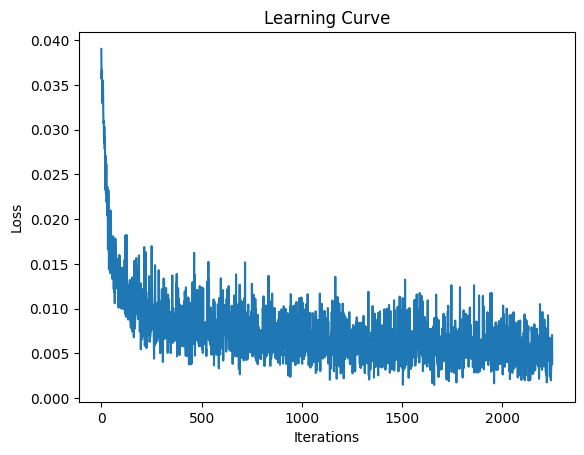

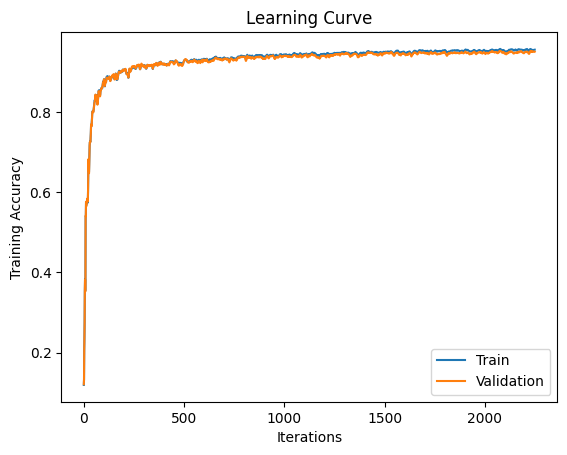

Final Training Accuracy: 0.9556041666666667
Final Validation Accuracy: 0.9506666666666667


In [ ]:
nmodel = NMLP(30, 5, 0.5)
train(nmodel, mnist_train, optimizer="adam", learning_rate=0.01, num_epochs=3)

<a name='3.3'></a>
##**Model (1):**

*   `Optimizer`: "Adam"
*   `Learning Rate`= 0.001
*   `Dropout Probability`= 0.2



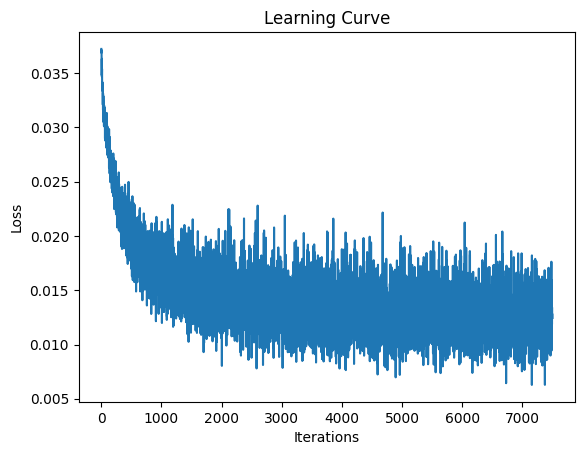

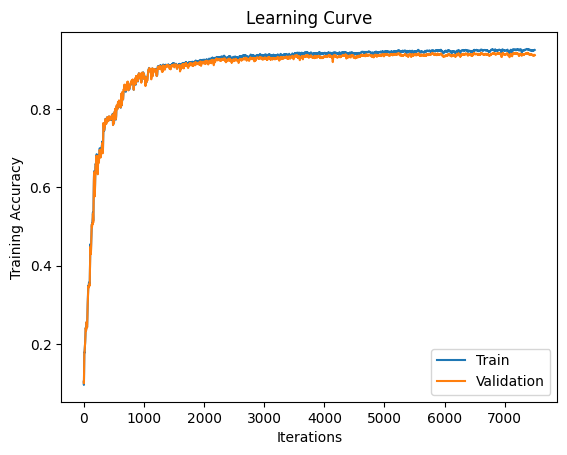

Final Training Accuracy: 0.9505833333333333
Final Validation Accuracy: 0.93675


In [ ]:
nmodel1 = NMLP(30, 5, 0.2)
train(nmodel1, mnist_train, optimizer="adam", learning_rate=0.001)

The optimizer Adam works well and is the most popular optimizer nowadays.
Adam typically requires a smaller learning rate: start at 0.001, then increase/decrease
as you see fit. For this example, 0.0005 works well.

<a name='3.4'></a>
##**Model (2):**

*   `Optimizer`: "Adam"
*   `Learning Rate`= 0.0005
*   `Dropout Probability`= 0.4


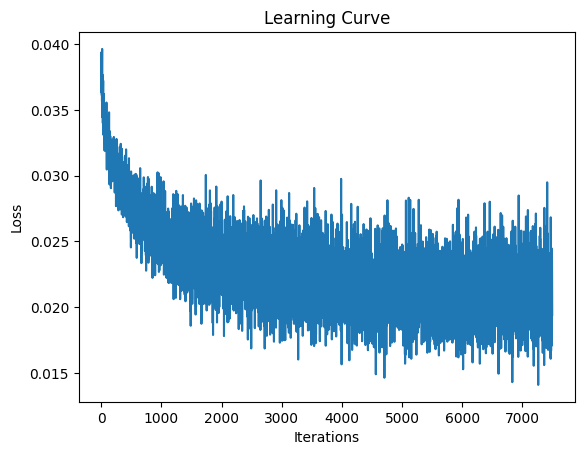

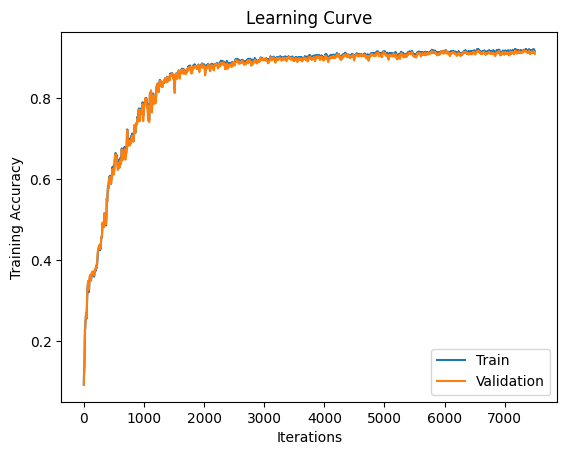

Final Training Accuracy: 0.9157916666666667
Final Validation Accuracy: 0.9095833333333333


In [ ]:
nmodel2 = NMLP(30, 5, 0.4)
train(nmodel2, mnist_train, optimizer="adam", learning_rate=0.0005)

<a name='3.5'></a>
##**Model (3):**

*   `Optimizer`: "Adam"
*   `Learning Rate`= 0.0001
*   `Dropout Probability`= 0.6


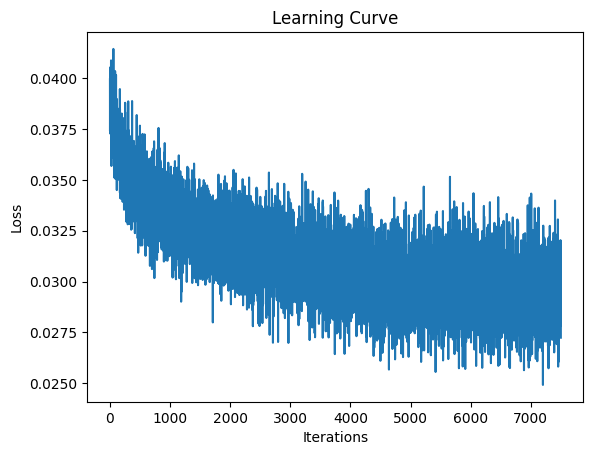

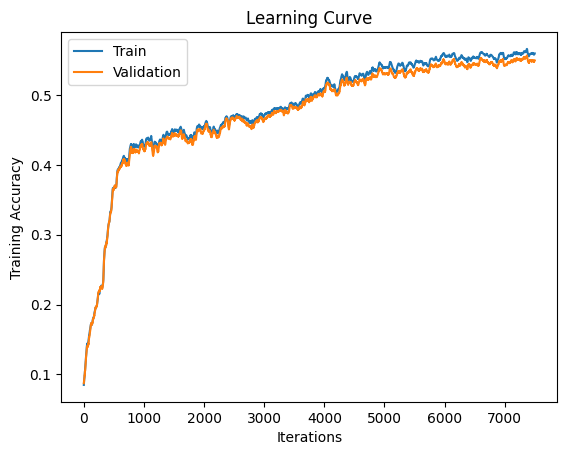

Final Training Accuracy: 0.5596666666666666
Final Validation Accuracy: 0.5495833333333333


In [ ]:
nmodel3 = NMLP(30, 5, 0.6)
train(nmodel3, mnist_train, optimizer="adam", learning_rate=0.0001)

It is ***common*** to observe a decrease in accuracy when increasing the dropout probability.
* In general, a dropout probability of `0.6` is relatively **high**, and can cause the model to underfit the training data, especially if the model has a large number of parameters. 
* Additionally, a learning rate of `0.0001` is quite **small**, and may cause the model to converge very slowly, or get stuck in a local minimum of the loss function.


 ***Dropout*** is a regularization technique that helps prevent overfitting by randomly dropping out some units in the neural network during training. This forces the remaining units to learn more robust features that are not dependent on the presence of specific units.